In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd


Mounted at /content/drive/


In [3]:
!ls "/content/drive/My Drive/ML/Ebay ML Challenge/2021/"

Annexure.pdf		  mlchallenge_set_2021.tsv.gz
attrDict.txt		  mlchallenge_set_validation.tsv
EbayChallenge_1.ipynb	  mlchallenge_set_validation.tsv.gz
mlchallenge_set_2021.tsv


In [4]:
import numpy as np
training_set = pd.read_csv("/content/drive/My Drive/ML/Ebay ML Challenge/2021/mlchallenge_set_2021.tsv", sep="\t", names= ['category', 'primary_image_url', 'all_image_urls', 'attributes', 'index'])
validation_set = pd.read_csv("/content/drive/My Drive/ML/Ebay ML Challenge/2021/mlchallenge_set_validation.tsv", sep="\t", names= ['category', 'primary_image_url', 'all_image_urls', 'attributes', 'index'])


In [4]:
training_set

,category,primary_image_url,all_image_urls,attributes,index
0,2,https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/iYYA...,https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/iYYA...,"(Brand:Shimano,US Shoe Size (Men's):4.5,Modifi...",0
1,2,https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...,https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...,"(Color:Gray/White,Country/Region of Manufactur...",1
2,2,https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...,https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...,"(Style:Cleats,Color:White Orange,US Shoe Size ...",2
3,2,http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...,http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...,"(Width:Medium (D, M),US Size:9,Brand:VANS,Colo...",3
4,2,https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...,https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...,"(US Shoe Size (Men's):10.5,Material:Enter item...",4
...,...,...,...,...,...
1002270,2,https://i.ebayimg.com/00/s/Njk5WDcyNQ==/z/zHMA...,https://i.ebayimg.com/00/s/Njk5WDcyNQ==/z/zHMA...,"(Style:Crossfit,Shoe Height:Low Top,Modified I...",1006085
1002271,2,https://i.ebayimg.com/00/s/MTIwMFgxMjAw/z/0MMA...,https://i.ebayimg.com/00/s/MTIwMFgxMjAw/z/0MMA...,"(Model:adidas Explosive Bounce,Product Line:ad...",1006086
1002272,2,https://i.ebayimg.com/00/s/MTE2M1gxNjAw/z/PSYA...,https://i.ebayimg.com/00/s/MTE2M1gxNjAw/z/PSYA...,"(Style:Running, Cross Training,US Shoe Size (M...",1006087
1002273,2,https://i.ebayimg.com/00/s/MTYwMFgxNjAw/z/ra8A...,https://i.ebayimg.com/00/s/MTYwMFgxNjAw/z/ra8A...,"(Brand:adidas,Pattern:Adidas Primeknit,Model:a...",1006088


In [53]:
str = training_set.iloc[0]['all_image_urls']
list_of_urls = str.split(';')

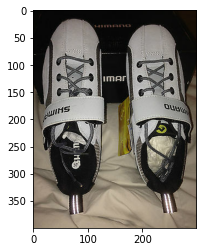

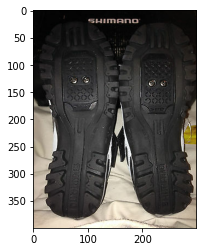

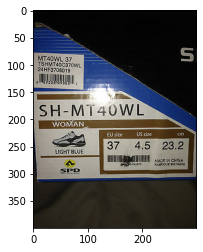

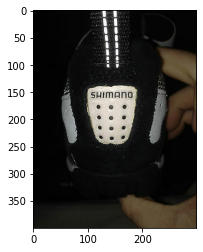

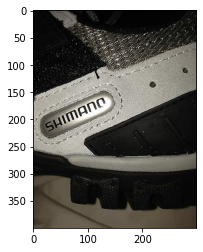

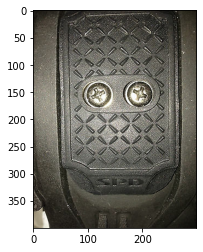

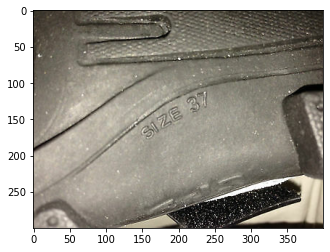

In [6]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt

for i in range(len(list_of_urls)):
  url = list_of_urls[i]
  image = Image.open(urllib.request.urlopen(url))
  plt.imshow(image)
  plt.show()

In [6]:
# parse attributes string
def parseAttributes(attributes):
  attr = attributes[1: len(attributes) - 1] # get rid of parenthesis
  attr = attr.split(':') # split by colon

  #split by comma
  for i in range(len(attr)): 
    attr[i] = attr[i].split(',')

  return attr

In [7]:
#create dictionary
def createDict(attributes):
  attr = parseAttributes(attributes)
  pairs = {}
  index = 0
  if len(attr) > 0:
    key = attr[0][0]

  for i in range(1, len(attr)):
    if i == (len(attr) - 1):
      val = attr[i][0:len(attr[i])]
    else:
      val = attr[i][0:len(attr[i]) - 1]
    pairs[key] = val
    key = attr[i][len(attr[i]) - 1]
  return pairs

In [8]:
# RUN IF DICTIONARY NOT CREATED
attrDict = []
for i in range(training_set.shape[0]):
  attr = training_set.iloc[i]['attributes']
  attrDict.append(createDict(attr))
attrDict

KeyboardInterrupt: ignored

In [10]:
import json
with open('attrDict.txt', 'w') as f:
  f.write(json.dumps(attrDict))

In [5]:
# OPEN DICTIONARY: ALREADY CREATED
import json
#Now read the file back into a Python list object
with open('/content/drive/My Drive/ML/Ebay ML Challenge/2021/attrDict.txt', 'r') as f:
    a = json.loads(f.read())

In [6]:
len(a)

1002275

In [7]:
cat = training_set.iloc[0 : training_set.shape[0]]['category']
cat1 = cat.tolist()
print(type(cat1))
print(set(cat1))
print(len(cat1)) 

<class 'list'>
{1, 2, 3, 4, 5}
1002275


In [8]:
descriptors = (set(a[i]) for i in range(len(a)))

In [9]:
descriptors = []
print(type(descriptors))
for i in range(len(a)):
  #print(set(a[i]))
  #descriptors = set(descriptors.extend(list(set(a[i]))))
  print(list(set(a[i])))
  descriptors.extend(list(set(a[i])))
  descriptors = list(set(descriptors))
  #print(descriptors)
descriptors

Streaming output truncated to the last 5000 lines.
["US Shoe Size (Men's)", 'Style', 'Brand']
["US Shoe Size (Men's)", 'Style', 'Brand', 'Color']
['Brand', "US Shoe Size (Men's)", 'Style', 'Color']
['Brand', "US Shoe Size (Men's)", 'Style', 'Color']
["US Shoe Size (Men's)", 'Style', 'Brand']
['Brand', "US Shoe Size (Men's)", 'Style', 'Color']
['Brand', "US Shoe Size (Men's)", 'Style', 'Color']
['Brand', "US Shoe Size (Men's)", 'Style']
["US Shoe Size (Men's)", 'Style', 'Brand']
['Brand', "US Shoe Size (Men's)", 'Style', 'Color']
["US Shoe Size (Men's)", 'Color', 'Style', 'Brand']
['Brand', "US Shoe Size (Men's)", 'Style']
["US Shoe Size (Men's)", 'Color', 'Material', 'Style', 'Width', 'Brand', 'Euro Size']
['Brand', "US Shoe Size (Men's)", 'Style', 'Color']
["US Shoe Size (Men's)", 'Pattern', 'Style', 'Color', 'Brand', 'Euro Size']
["US Shoe Size (Men's)", 'Color', 'Style', 'Product Line', 'Brand']
['Brand', "US Shoe Size (Men's)", 'Style', 'Color']
["US Shoe Size (Men's)", 'Style', 'B

['',
 'Speeds',
 '7 for all Mankind',
 'Battery life',
 'Cuffs',
 'paige citizens humanity adriano ag jcrew',
 '14 Slim (waist',
 '14.4V Dust Storage Type',
 'Flare Jeans',
 'Seller Rank',
 'Decibals',
 'Overall Condition',
 'Returnable',
 'SKINNY ANKLE',
 'Corners',
 'Outside length',
 'Mpn',
 'Collab Name',
 'colorname',
 'Dinner Forks',
 'Shape',
 'Softness',
 'Miss Me Jeans',
 'dakota',
 '29 ( Measured',
 '0.4 x L',
 'Character Family',
 'Additional product features',
 'golf shoe type',
 'SER No.',
 'Clasp',
 'CD6848 102 (PS)',
 'Trending',
 'Inside Material',
 'Working Voltage',
 'keyword',
 'Measure of waist laid flat',
 'Conductor Material',
 'SIZE',
 'Medical',
 'Previously Enjoyed',
 'Product non-national',
 'MAD IN',
 'Voltage supply',
 'UNSPSC',
 'Operation Style',
 'SET 6 DINNER FORKS',
 'Material_composition',
 'Black/Grey',
 'Large dust cup capacity',
 'Pillow Cover Size',
 ' 26/L',
 'Products of knives and forks',
 'Wash Colour',
 'Won’t Fall Down Stairs',
 'Jeggings',
 